<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/2021/notebooks/Python_r08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

回帰分析において、  
相関係数などの統計量が同じものの、散布図を書いてみると全く異なる現象が観測されることがあります。  
統計学者のフランク・アンスコムによって紹介され、データを可視化する可視化するや基本統計量のみをもちいた解析では不十分だということを示す例として知られています。

以下では、アンスコムの例とは少し違いますが、  
4つの異なる散布図を生成するプログラムしてみましょう。

実行すると、  
(左上) 適当な直線にノイズを加えたデータ  
(右上) 二次式にノイズを加えたデータ  
(左下) 外れ値が存在するデータ  
(右下) 2つのグループが存在するデータ  

これらはいずれも
xとyの相関係数が0.01以下の精度で0.8に等しくなっています。

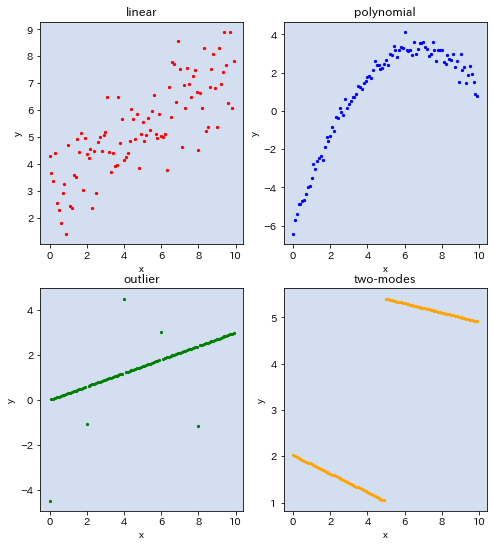

In [0]:
import numpy as np
from matplotlib import pyplot as plt
!pip install japanize_matplotlib
import japanize_matplotlib

def m_sigma(X,Y):
    Xb=np.mean(X);Yb=np.mean(Y)
    return np.dot(X-Xb,Y-Yb)
def m_corr(X,Y):
    return m_sigma(X,Y)/np.sqrt(m_sigma(X,X)*m_sigma(Y,Y))

def mainplot(XYs):
    fig = plt.figure(figsize=(8,9))
    axs = [fig.add_subplot(2,2,1),fig.add_subplot(2,2,2),
           fig.add_subplot(2,2,3),fig.add_subplot(2,2,4)]
    cols = ["red", "blue", "green", "orange"]
    for i, XY in enumerate(XYs):
        axs[i].set_facecolor("#D3DEF1")
        axs[i].set_xlabel("x"); axs[i].set_ylabel("y")
        axs[i].set_title(XY[3])
        axs[i].scatter(XY[0],XY[1],s=5,color=cols[i])
    plt.show()
    plt.close()    

if __name__ == "__main__":
    target_r = 0.80
    itnum = 10000
    XYs=[]
    np.random.seed(10)
    X= np.arange(0,10,0.1)
    hit=0; hit1 = 0; hit2=0
    for tmp in range(itnum):
        Y= 3.0+0.5*X + np.random.normal(0,1.0,len(X))
        corr=m_corr(X,Y)
        if abs(corr -target_r) < 1.e-4:
            XYs += [ [X,Y,corr,"linear"] ]
            break
    for tmp in range(itnum):
        Y= -6+2.78*X -0.207*X*X + np.random.normal(0,0.3,len(X))
        corr=m_corr(X,Y)
        if abs(corr -target_r) < 1.e-4:
            XYs += [ [X,Y,corr,"polynomial"] ]
            break
    for tmp in range(itnum):
        Y = 0.3 * X
        for j in range(len(Y)):
            if j % 20 == 0:
                Y[j] += np.random.normal(0,3.0)
        corr=m_corr(X,Y)
        if abs(corr -target_r) < 1.e-4:
            XYs += [ [X,Y,corr,"outlier"] ]
            break
    X1=[]; X2=[]
    for i,tmp in enumerate(X):
        if i < len(X)//2 :
            X1 += [tmp]
        else:
            X2 += [tmp]
    X = np.hstack([X1,X2])
    for i in range(itnum):
        Y1 = 2.026 -0.2*np.array(X1) #+ np.random.normal(0,1.0,len(X1))                                                                                                                                             
        Y2 = 5.904- 0.1*np.array(X2) #+ np.random.normal(0,1.0,len(X2))                                                                                                                                             
        Y = np.hstack([Y1,Y2])
        corr=m_corr(X,Y)
        if abs(corr -target_r) < 1.e-4:
            XYs += [ [X,Y,corr,"two-modes"] ]
            break
mainplot(XYs)